In [1]:
import numpy as np 
import pandas as pd
from collections import Counter
import scipy.stats as sts
import sympy as sm 
import matplotlib.pyplot as plt
plt.style.use("dark_background")

#### ***7.3. Статистическое распределение выборки. Эмпирическая функция распределения.***

Пусть изучается некоторая СВ $X$. С этой целью над СВ $X$ производится ряд независимых опытов (наблюдений). В каждом из этих опытов величина $X$ принимает то или иное значение.

Пусть она приняла $n_1$ раз значение $x_1$, $n_2$ раз - значение $x_2$, ..., $n_k$ раз - значение $x_k$. При этом $n_1+n_2+...+n_k = n $ - объем выборки: 
<ul>
    <li>значения $x_1, x_2, ..., x_k$ называются <i>вариантами</i> СВ $X$;</li>
    <li>операция расположения значений СВ (признака) по неубыванию называется <i>ранжированием</i> статистических данныхю Полученная таким образом последовательность $x_{(1)},x_{(2)},...,x_{(n)}$ значенией СВ $X$, где $x_{(1)} \leq x_{(2)}\leq...\leq x_{(n)}$ и $x_1 = \underset {1\leq i \leq n}{min} X_i, ..., x_n = \underset {1\leq i \leq n}{max} X_i$ называется <i>вариационным рядом</i>;</li>
    <li>$p^*=\frac{n_i}{n}$ - относительные частоты;</li>
    <li>перечень вариантов и соответствующих им частот называется *статистическим распределением выборки* или <i>статистическим рядом</i>.</li>
</ul>
    



In [2]:
n = 20   # объем выборки
v = 6    # кол-во значений СВ
np.random.seed(1)
rvs = np.random.randint(v, size=n).tolist()  # генерация частостей
print('Выборка: ')
freqs = Counter(rvs)
print(rvs, '\n')
print('Вариационный ряд:') 
print(sorted(freqs.keys()), '\n')

print('Статистический ряд (статистическое распределение выборки): ')
freqs = dict(sorted(freqs.items(), key=lambda x: x[0]))
display(pd.DataFrame([freqs.keys(), freqs.values()], columns=['']*v, index=['$X$', r'$n_i$']))

freqs = {rv: freq/n for rv, freq in freqs.items()}
pd.DataFrame([freqs.keys(), freqs.values()], columns=['']*v, index=['$X$', r'$p^*$'])

Выборка: 
[5, 3, 4, 0, 1, 3, 5, 0, 0, 1, 4, 5, 4, 1, 2, 4, 5, 2, 4, 3] 

Вариационный ряд:
[0, 1, 2, 3, 4, 5] 

Статистический ряд (статистическое распределение выборки): 


,,,,,,
$X$,0,1,2,3,4,5
$n_i$,3,3,2,3,5,4


,,,,,,
$X$,0.00,1.00,2.0,3.00,4.00,5.0
$p^*$,0.15,0.15,0.1,0.15,0.25,0.2


*Статистическое распределение выборки является оценкой неизвестного распределения.* В соответствии с теоремой Бернулли относительные частоты $p_i^*$ сходятся при $n \to \infty$ к соответствующим вероятностям $p_i$, т.е. $p_i^* \xrightarrow[n\to \infty]{p} p_i$. Поэтом при больших значениях $n$ статистическое распределение мало отличается от истинного распределения.

В случае, когда число значенйи признака (СВ $X$) велико или признак является непрерывным, составляют ***интервальный статистический ряд***. В первую строку таблицы статистического распределения вписывают частичные промежутки $[x_0, x_1), [x_1, x_2),..., [x_{k-1}, x_k)$, которые берут обычно одинаковыми по длине:  $h=x_1-x_0 = x_2-x_1 = ...$ . Для определения величины интервала (h) можно использовать формулу Стерджеса:
$$\notag h = \frac{x_{max} - x_{min}}{1+\log_2 n}$$

***Пример.*** Измерили рост (с точностью до см) 30 наудачу отобранных студентов. Результаты измерений таковы:

In [3]:
# np.random.seed(2)
l = 30 # объем выборки
rvs = sts.norm(loc=176, scale=7).rvs(l).astype('int')  # генерируем выборку

print('Проранжируем полученные данные:')
rvs = sorted(rvs)
print(rvs)

# посчитаем величину интервала (h)
x_max, x_min, n, h = sm.symbols('x_max x_min n h')
interval = (x_max-x_min)/(1+sm.log(n, 2))
display(sm.Eq(h, interval))
h = np.ceil(interval.evalf(subs = {x_max: rvs[-1], x_min: rvs[0], n: l}))
print('Ширина интервала (h) равна', h)

Проранжируем полученные данные:
[159, 165, 165, 166, 166, 167, 169, 170, 172, 172, 172, 173, 173, 173, 173, 173, 176, 176, 176, 177, 177, 177, 180, 181, 182, 182, 182, 183, 185, 187]


Eq(h, (x_max - x_min)/(log(n)/log(2) + 1))

Ширина интервала (h) равна 5


In [4]:
# получим интервальный статистический ряд
rvs_ = rvs.copy()

intervals, variations = [], []      # интервалы, варианты
i = rvs_[0]                     
rv = rvs_.pop(0)

while rvs_:
    
    subint = []
    i += h
    # import pdb; pdb.set_trace()

    while rv<i and rvs_:
            
            subint.append(rv)
            rv = rvs_.pop(0)
    
    intervals.append(f'[{i-h}, {i})')
    variations.append(subint)

if rv: 
    variations[-1].append(rv)
    del intervals[-1]
    intervals.append(f'[{i-h}, {rv})')
    
series = {i: (len(v), len(v)/l) for i, v in zip(intervals, variations)}
print(variations)
print('Интервальный статистический ряд: ')
series = pd.DataFrame(series, index=('Частота', 'Частость')) 
display(series)

# проверим результаты
print(int(series.iloc[0, :].sum()) == l)   # кол-во испытаний
print(series.iloc[1, :].sum() == 1)        # сумма всех частот 

[[159], [165, 165, 166, 166, 167], [169, 170, 172, 172, 172, 173, 173, 173, 173, 173], [176, 176, 176, 177, 177, 177], [180, 181, 182, 182, 182, 183], [185, 187]]
Интервальный статистический ряд: 


,"[159, 164)","[164, 169)","[169, 174)","[174, 179)","[179, 184)","[184, 187)"
Частота,1.000000,5.000000,10.000000,6.0,6.0,2.000000
Частость,0.033333,0.166667,0.333333,0.2,0.2,0.066667


True
True


***Эмпирической (статистической) функцией распределения*** называется функция $F_n^*(x)$, определяющая для каждого значения $x$ частость события $\{X<x\}$:
$$F_n^*(x)=p^*\{X<x\}.$$

***Теорема*** Пусть $F_n^*(x)$ - теоретическая фыункция распределения СВ $X$, а $F_n^*(x)$ - эмпирическая. Тогда для любого $\varepsilon > 0$
$$\lim\limits_{n\to\infty}P\{|F_n^*(x) - F(x) | <\varepsilon \}=1 \notag$$

***Пример.***  Построить функцию $F_n^*(x)$.

Выборка:
[9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7 7 9 7 3]


,0,2,3,4,5,6,7,8,9
$p^*$,0.05,0.05,0.15,0.05,0.05,0.1,0.25,0.1,0.2


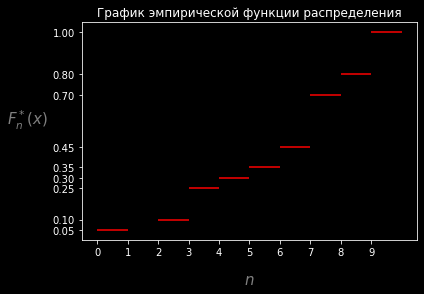

In [5]:
# генерируем выборку объемом n
n=20
mx = 10
# np.random.seed(2)
rvs = np.random.randint(0, mx, size=n)
print('Выборка:')
print(rvs)

# строим статистический ряд
series = {rv: n_i/n for rv, n_i in Counter(rvs).items()}
series = dict(sorted(series.items()))

display(pd.DataFrame(series, index=['$p^*$']))

# считаем эмпирическую функция распределения
F = []
i = 0
for p in series.values():
    i += p
    F.append(i)
    
# визуализируем ее
plt.hlines(y=F, xmin=series.keys(), xmax=np.array(list(series.keys()))+1, color='r')
plt.xlabel(r'$n$', fontsize=15, labelpad=15, color='grey')
plt.ylabel(r'$F_n^*(x)$', fontsize=15, labelpad=25, color='grey', rotation=0)
plt.xticks(list(range(mx)), visible=True)
plt.yticks(F)
plt.title('График эмпирической функции распределения')

# plt.legend(prop={'size': 23}, loc='best')
plt.show()